# Average differential equation
I test a differential equation (online method) to keep track of the probabilities

In [1]:
import  pprint
import  subprocess 
import sys 
sys.path.append('../')

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.gridspec as gridspec
from matplotlib.colors import Normalize
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns

%matplotlib inline
plt.rcParams['figure.figsize'] = (12.9, 12)

np.set_printoptions(suppress=True, precision=5)

sns.set(font_scale=3.5)

## Sin(x)

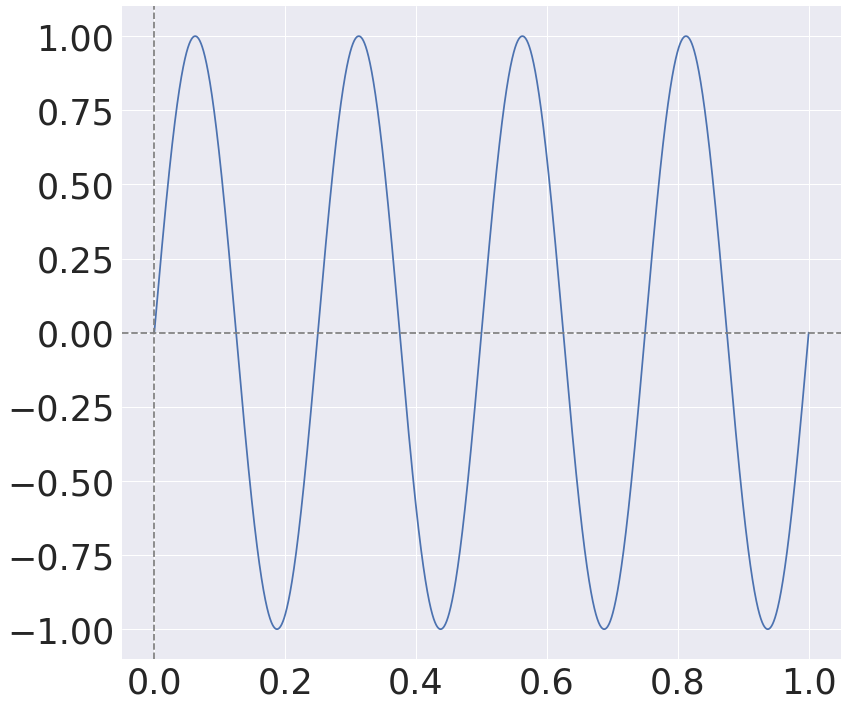

In [2]:
dt = 0.0001
total_time = 1.0
n_t = int(total_time / dt)
period = 0.250
time = np.linspace(0, total_time, num=n_t)
y = np.sin(time * 2 *  np.pi / period)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(time, y)

ax.axhline(0, ls='--', color='gray')
ax.axvline(0, ls='--', color='gray');

In [3]:
T = 0.5
def average_till_t(t, function, dt):
    n_t = int(t / dt)
    if n_t > 0:
        return function[:n_t].mean()
    else:
        return function[0]

In [4]:
p = []
for t in time:
    p.append(average_till_t(t, y, dt))

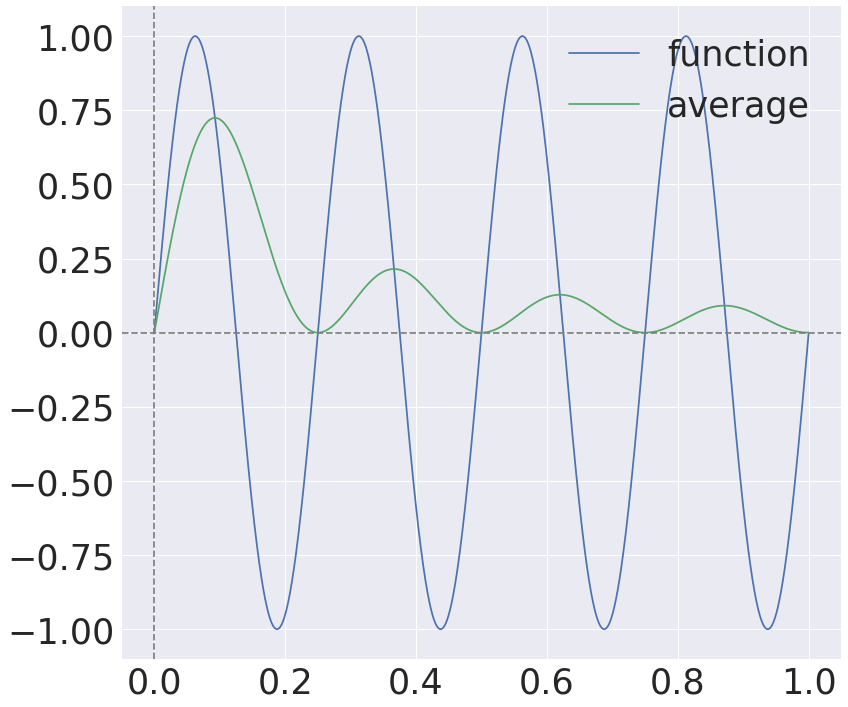

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(time, y, label='function')
ax.plot(time, p, label='average')

ax.axhline(0, ls='--', color='gray')
ax.axvline(0, ls='--', color='gray')

ax.legend();

#### Differential equation

In [6]:
p_diff = np.zeros(n_t)
p_diff[0] = 0 
p_diff[1] = 0

for index in range(1, n_t - 1):
    p_diff[index + 1] = p_diff[index] + (dt / time[index]) * (y[index] - p_diff[index])

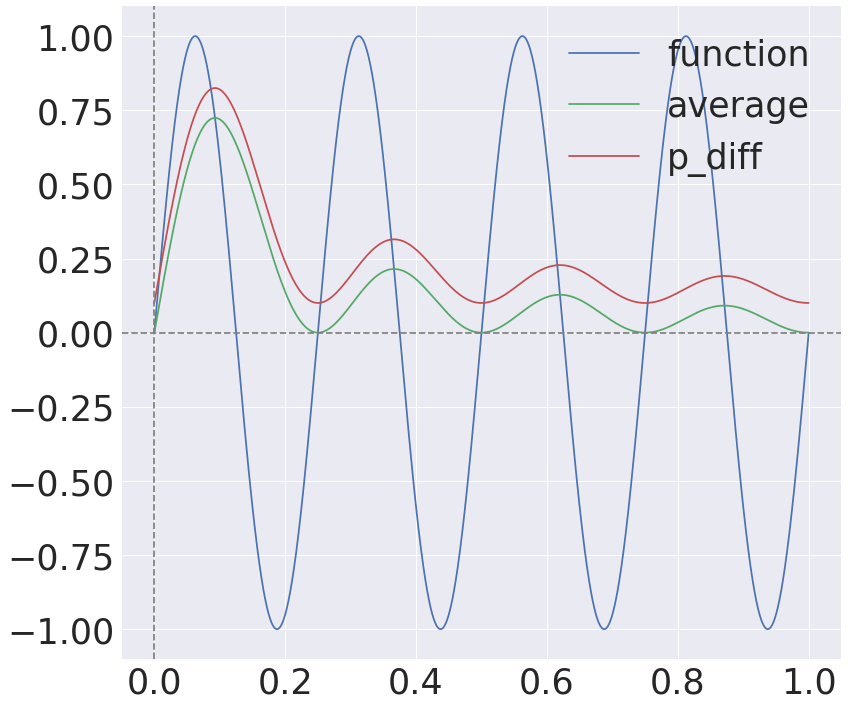

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(time, y, label='function')
ax.plot(time, p, label='average')
ax.plot(time, p_diff + 0.1, label='p_diff')

ax.axhline(0, ls='--', color='gray')
ax.axvline(0, ls='--', color='gray')

ax.legend();

#### Second differential equation

In [8]:
p_diff2 = np.zeros(n_t)
p_diff2[0] = 0 

for index in range(0, n_t - 1):
    factor1 = time[index] + dt
    factor2 = 1 + dt / time[index]
    p_diff[index + 1] = y[index]/factor1 + p_diff[index] / factor2

/home/heberto/miniconda2/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  


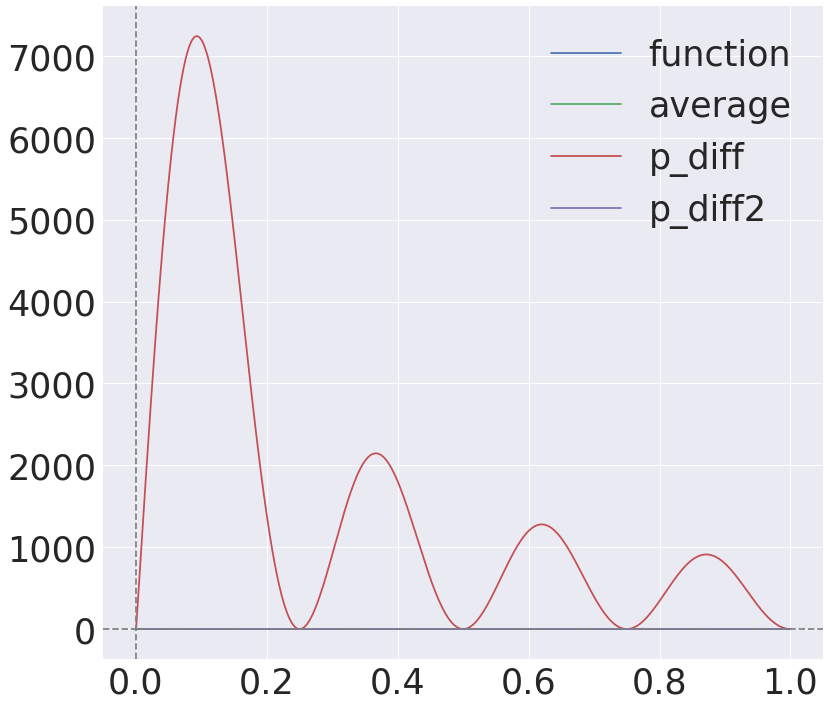

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(time, y, label='function')
ax.plot(time, p, label='average')
ax.plot(time, p_diff, label='p_diff')
ax.plot(time, p_diff2, label='p_diff2')


ax.axhline(0, ls='--', color='gray')
ax.axvline(0, ls='--', color='gray')

ax.legend();